In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

## Plot the wave of the loaded audio

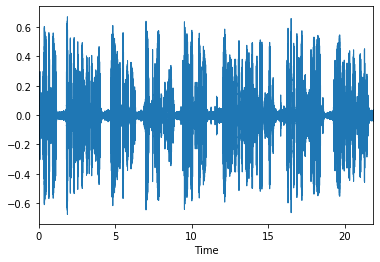

In [9]:
x, fs = librosa.load('./audio/english1.wav')
librosa.display.waveplot(x, sr=fs)
plt.show()

## Play the audio

In [11]:
import IPython
IPython.display.Audio(x, rate=fs)

## librosa.feature.mfcc

In [13]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

(20, 942)


In this case, mfcc computed 20 MFCCs over 942 frames.

Display the MFCCs:

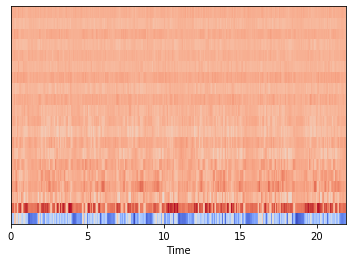

In [14]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

## Feature Scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [17]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.8033253e-08  6.2009078e-09  8.0358706e-09 -9.8075581e-10
 -3.1700559e-08  3.7964742e-10 -2.7840811e-08 -2.0121313e-08
 -2.3791237e-08  2.5942574e-08  5.3150639e-09 -1.3793856e-08
  4.4292201e-09  1.3540758e-08  2.0358593e-08  1.9615116e-09
  7.5296738e-09 -1.2528365e-08 -3.2523129e-08 -1.1167962e-08]
[1.0000001  1.0000011  0.9999992  1.0000008  0.9999991  1.0000002
 0.9999994  1.0000011  1.0000002  1.0000004  0.99999976 0.9999999
 0.99999994 0.99999934 0.9999998  0.9999986  1.0000001  1.0000002
 1.0000001  1.0000001 ]


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Display the scaled MFCCs:

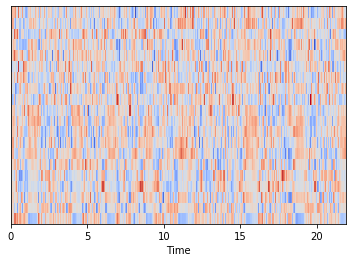

In [18]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

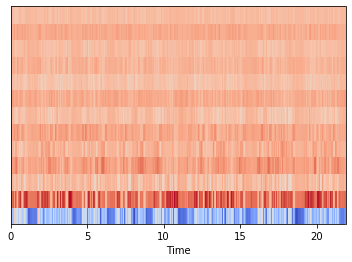

In [29]:
RATE = 24000
resampled_mfcc = librosa.feature.mfcc(y=librosa.core.resample(y=x,orig_sr=fs,target_sr=RATE, scale=True), sr=RATE, n_mfcc=13)
librosa.display.specshow(resampled_mfcc, sr=RATE, x_axis='time')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


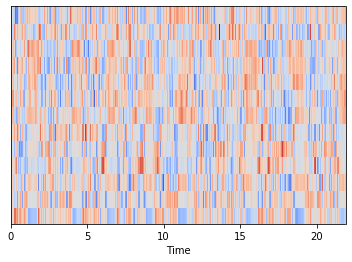

In [38]:
librosa.display.specshow(sklearn.preprocessing.scale(resampled_mfcc, axis=1), sr=RATE, x_axis='time')

## Convert all the waves to png

In [41]:
import pandas as pd
df = pd.read_csv("./src/bio_metadata.csv")

In [56]:
w_x, w_fs = librosa.load('./audio/{}.wav'.format(df['language_num'][1]))

RATE = 24000
resampled_mfcc = librosa.feature.mfcc(y=librosa.core.resample(y=w_x,orig_sr=w_fs,target_sr=RATE, scale=True), sr=RATE)

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
# save as png
p = librosa.display.specshow(resampled_mfcc, sr=RATE, ax=ax, x_axis='time')
fig.savefig('spec.png')

In [52]:
dir(fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_dpi',
 '_gci',
 '_get_axes',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_ax',
 '_remove_method',
 '_repr_html_',
 '_set